Based on the GradCAM Implementation at https://colab.research.google.com/drive/1rxmXus_nrGEhxlQK_By38AjwDxwmLn9S?usp=sharing, associated with the towards data science article at https://towardsdatascience.com/understand-your-algorithm-with-grad-cam-d3b62fce353

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn

In [ ]:
def pred_to_accuracy(pred, label): # pred is (#samples,)
  unique = np.unique(pred, return_counts=True)
  map = {}
  for i,cl in enumerate(unique[0]):
    map[i] = cl
  numPred = 0
  correctPred = 0
  for i, count in enumerate(unique[1]):
    cl = map[i]
    if cl == label:
      correctPred += count
    numPred += count

  return (100*correctPred/numPred)

In [ ]:
int_to_str = {0:'StyleGAN', 1:'CelebFaces', 2:'PGGAN'}
str_to_int = {int_to_str[key]:key for key in int_to_str}

In [ ]:
xTest = np.load('/content/drive/My Drive/X_test_3class.npy')

In [ ]:
yTest = np.load('/content/drive/My Drive/y_test_3class.npy')
yTest = np.argmax(yTest, axis=1)

In [ ]:
xSG = xTest[np.where(yTest == str_to_int['StyleGAN'])]
xCF = xTest[np.where(yTest == str_to_int['CelebFaces'])]
xPG = xTest[np.where(yTest == str_to_int['PGGAN'])]

[ 948 1063  989]


Text(0, 0.5, 'Number of Images in Test Data')

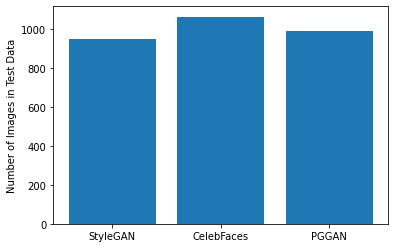

In [ ]:
arr, counts = np.unique(yTest, return_counts = True)
print(counts)
names = [int_to_str[x] for x in arr]
plt.bar(names, counts)
plt.ylabel('Number of Images in Test Data')

In [ ]:
print(xSG.shape)
print(xCF.shape)
print(xPG.shape)

(948, 178, 178, 3)
(1063, 178, 178, 3)
(989, 178, 178, 3)


# Evaluating StyleGAN / PGGAN Base Model

In [ ]:
model1 = tf.keras.models.load_model('/content/drive/My Drive/2-class-base')
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 89, 89, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 44, 44, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 44, 44, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 22, 22, 128)     

In [ ]:
# load 2 class xTest and yTest
xTest1 = np.load('/content/drive/My Drive/X_test_2class.npy')
yTest1 = np.load('/content/drive/My Drive/y_test_2class.npy')
yTest1 = np.argmax(yTest1, axis = 1)

Test accuracy =  97.25


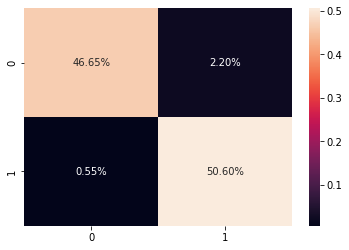

In [ ]:
### Evaluate overall test accuracy
yPred1 = model1.predict(xTest1)
yPred1 = np.argmax(yPred1, axis=1)
print('Test accuracy = ', 100*np.mean(yPred1 == yTest1))
matrix1 = confusion_matrix(yTest1, yPred1)
seaborn.heatmap(matrix1/np.sum(matrix1), annot=True, fmt='.2%')

In [ ]:
### Evaluate accuracy on StyleGAN 
xSG1 = xTest1[np.where(yTest1 == 0)]
predSG1 = model1.predict(xSG1)
predSG1 = np.argmax(predSG1, axis=1)
print('Accuracy on StyleGAN images = ', pred_to_accuracy(predSG1, 0))

Accuracy on StyleGAN images =  95.496417604913


In [ ]:
### Evaluate accuracy on PGGAN
xPG1 = xTest1[np.where(yTest1 == 1)]
predPG1 = model1.predict(xPG1)
predPG1 = np.argmax(predPG1, axis=1)
print('Accuracy on PGGAN images = ', pred_to_accuracy(predPG1, 1))

Accuracy on PGGAN images =  98.9247311827957


# Evaluating StyleGAN / CelebFaces / PGGAN Base Model

In [ ]:
model2 = tf.keras.models.load_model('/content/drive/My Drive/3-class-base')
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 89, 89, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 44, 44, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 44, 44, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 22, 22, 128)     

Test accuracy =  98.83333333333333


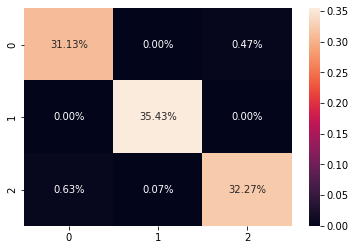

In [ ]:
### Evaluate overall test accuracy
yPred2 = model2.predict(xTest)
yPred2 = np.argmax(yPred2, axis=1)
print('Test accuracy = ', 100*np.mean(yPred2 == yTest))
matrix2 = confusion_matrix(yTest, yPred2)
seaborn.heatmap(matrix2/np.sum(matrix2), annot=True, fmt='.2%')

In [ ]:
### Accuracy on StyleGAN
name = 'StyleGAN'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix2[label, label]/np.sum(matrix2[label,:]))

Accuracy on StyleGAN = 0.9852320675105485


In [ ]:
### Accuracy on CelebFaces
name = 'CelebFaces'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix2[label, label]/np.sum(matrix2[label,:]))

Accuracy on CelebFaces = 1.0


In [ ]:
### Accuracy on PGGAN
name = 'PGGAN'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix2[label, label]/np.sum(matrix2[label,:]))

Accuracy on PGGAN = 0.9787664307381193


# Evaluating StyleGAN / CelebFaces / PGGAN Baseline Model + Fully Connected Layer

In [ ]:
model4 = tf.keras.models.load_model('/content/drive/My Drive/model_linear')
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 re_lu (ReLU)                (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 89, 89, 64)        18496     
                                                                 
 re_lu_1 (ReLU)              (None, 89, 89, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 44, 44, 64)       0         
 2D)                                                    

Test accuracy =  95.0


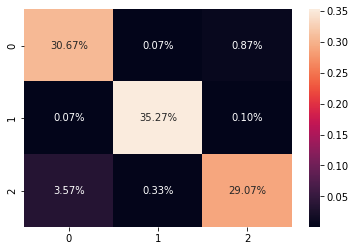

In [ ]:
### Evaluate overall test accuracy
yPred4 = model4.predict(xTest)
yPred4 = np.argmax(yPred4, axis=1)
print('Test accuracy = ', 100*np.mean(yPred4 == yTest))
matrix4 = confusion_matrix(yTest, yPred4)
seaborn.heatmap(matrix4/np.sum(matrix4), annot=True, fmt='.2%')

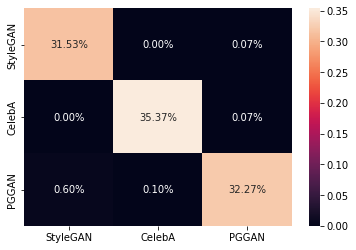

In [ ]:
matrix4 = confusion_matrix(yTest, yPred4)
conf = seaborn.heatmap(matrix4/np.sum(matrix4), annot=True, fmt='.2%', xticklabels=['StyleGAN', 'CelebA', 'PGGAN'], 
                yticklabels=['StyleGAN', 'CelebA', 'PGGAN'], )

In [ ]:
### Accuracy on StyleGAN
name = 'StyleGAN'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix4[label, label]/np.sum(matrix4[label,:]))

Accuracy on StyleGAN = 0.9704641350210971


In [ ]:
### Accuracy on CelebFaces
name = 'CelebFaces'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix4[label, label]/np.sum(matrix4[label,:]))

Accuracy on CelebFaces = 0.9952963311382879


In [ ]:
### Accuracy on PGGAN
name = 'PGGAN'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix4[label, label]/np.sum(matrix4[label,:]))

Accuracy on PGGAN = 0.8816986855409504


# Evaluating StyleGAN / CelebFaces / PGGAN Base Model + Fully Connected Layer + Dropout

In [ ]:
model5 = tf.keras.models.load_model('/content/drive/My Drive/model_dropout')
model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 re_lu_3 (ReLU)              (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 89, 89, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 89, 89, 64)        18496     
                                                                 
 re_lu_4 (ReLU)              (None, 89, 89, 64)        0         
                                                      

Test accuracy =  96.83333333333334


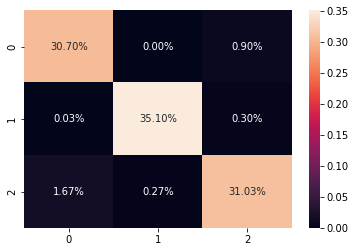

In [ ]:
### Evaluate overall test accuracy
yPred5 = model5.predict(xTest)
yPred5 = np.argmax(yPred5, axis=1)
print('Test accuracy = ', 100*np.mean(yPred5 == yTest))
matrix5 = confusion_matrix(yTest, yPred5)
seaborn.heatmap(matrix5/np.sum(matrix5), annot=True, fmt='.2%')

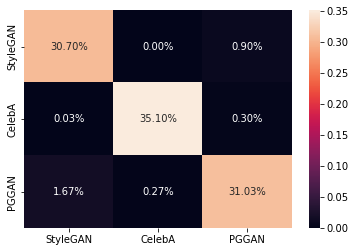

In [ ]:
matrix5 = confusion_matrix(yTest, yPred5)
conf = seaborn.heatmap(matrix5/np.sum(matrix5), annot=True, fmt='.2%', xticklabels=['StyleGAN', 'CelebA', 'PGGAN'], 
                yticklabels=['StyleGAN', 'CelebA', 'PGGAN'], )

In [ ]:
### Accuracy on StyleGAN
name = 'StyleGAN'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix5[label, label]/np.sum(matrix5[label,:]))

Accuracy on StyleGAN = 0.9715189873417721


In [ ]:
### Accuracy on CelebFaces
name = 'CelebFaces'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix5[label, label]/np.sum(matrix5[label,:]))

Accuracy on CelebFaces = 0.9905926622765757


In [ ]:
### Accuracy on PGGAN
name = 'PGGAN'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix5[label, label]/np.sum(matrix5[label,:]))

Accuracy on PGGAN = 0.9413549039433772


# Evaluating StyleGAN / CelebFaces / PGGAN Final Model

In [ ]:
model3 = tf.keras.models.load_model('/content/drive/My Drive/final_model')
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 re_lu (ReLU)                (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 89, 89, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 89, 89, 64)        18496     
                                                                 
 re_lu_1 (ReLU)              (None, 89, 89, 64)        0         
                                                        

Test accuracy =  98.36666666666667


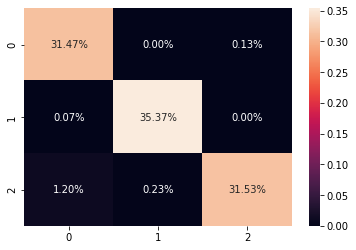

In [ ]:
### Evaluate overall test accuracy
yPred3 = model3.predict(xTest)
yPred3 = np.argmax(yPred3, axis=1)
print('Test accuracy = ', 100*np.mean(yPred3 == yTest))
matrix3 = confusion_matrix(yTest, yPred3)
seaborn.heatmap(matrix3/np.sum(matrix3), annot=True, fmt='.2%')

In [ ]:
### Accuracy on StyleGAN
name = 'StyleGAN'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix3[label, label]/np.sum(matrix3[label,:]))

Accuracy on StyleGAN = 0.9957805907172996


In [ ]:
### Accuracy on CelebFaces
name = 'CelebFaces'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix3[label, label]/np.sum(matrix3[label,:]))

Accuracy on CelebFaces = 0.9981185324553151


In [ ]:
### Accuracy on PGGAN
name = 'PGGAN'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix3[label, label]/np.sum(matrix3[label,:]))

Accuracy on PGGAN = 0.9565217391304348


# Evaluating 3x3 High-Pass Model

In [ ]:
from scipy import ndimage

n_images = len(xTest)
X_test_np = np.zeros((n_images, 178, 178, 3))

kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

print('.... Loading Images From Files ....')
for i in range(n_images):
  img0 = xTest[i][:, :, 0]
  img1 = xTest[i][:, :, 1]
  img2 = xTest[i][:, :, 2]
  X_test_np[i, :, :, 0] = ndimage.convolve(img0, kernel, mode='constant')
  X_test_np[i, :, :, 1] = ndimage.convolve(img1, kernel, mode='constant')
  X_test_np[i, :, :, 2] = ndimage.convolve(img2, kernel, mode='constant')
  if i%1000 == 0:
    print('iteration', i)

.... Loading Images From Files ....
iteration 0
iteration 1000
iteration 2000


In [ ]:
model3 = tf.keras.models.load_model('/content/drive/My Drive/sharpening_model')
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 re_lu_15 (ReLU)             (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 89, 89, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 89, 89, 64)        18496     
                                                                 
 re_lu_16 (ReLU)             (None, 89, 89, 64)        0         
                                                      

Test accuracy =  99.76666666666667


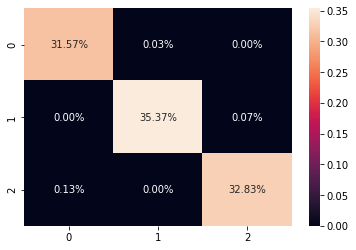

In [ ]:
### Evaluate overall test accuracy
yPred3 = model3.predict(X_test_np)
yPred3 = np.argmax(yPred3, axis=1)
print('Test accuracy = ', 100*np.mean(yPred3 == yTest))
matrix3 = confusion_matrix(yTest, yPred3)
seaborn.heatmap(matrix3/np.sum(matrix3), annot=True, fmt='.2%')

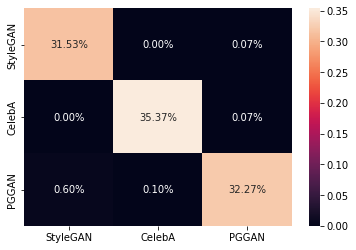

In [ ]:
matrix3 = confusion_matrix(yTest, yPred3)
conf = seaborn.heatmap(matrix4/np.sum(matrix3), annot=True, fmt='.2%', xticklabels=['StyleGAN', 'CelebA', 'PGGAN'], 
                yticklabels=['StyleGAN', 'CelebA', 'PGGAN'], )

In [ ]:
### Accuracy on StyleGAN
name = 'StyleGAN'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix3[label, label]/np.sum(matrix3[label,:]))

Accuracy on StyleGAN = 0.9989451476793249


In [ ]:
### Accuracy on CelebFaces
name = 'CelebFaces'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix3[label, label]/np.sum(matrix3[label,:]))

Accuracy on CelebFaces = 0.9981185324553151


In [ ]:
### Accuracy on PGGAN
name = 'PGGAN'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix3[label, label]/np.sum(matrix3[label,:]))

Accuracy on PGGAN = 0.9959555106167847


# Evaluating 5x5 High-Pass Model

In [ ]:
from scipy import ndimage

n_images = len(xTest)
X_test_np = np.zeros((n_images, 178, 178, 3))

kernel = kernel = np.array(
[[-1, -1, -1, -1, -1],
[-1, 1, 2, 1, -1],
[-1, 2, 4, 2, -1],
[-1, 1, 2, 1, -1],
[-1, -1, -1, -1, -1]])

print('.... Loading Images From Files ....')
for i in range(n_images):
  img0 = xTest[i][:, :, 0]
  img1 = xTest[i][:, :, 1]
  img2 = xTest[i][:, :, 2]
  X_test_np[i, :, :, 0] = ndimage.convolve(img0, kernel, mode='constant')
  X_test_np[i, :, :, 1] = ndimage.convolve(img1, kernel, mode='constant')
  X_test_np[i, :, :, 2] = ndimage.convolve(img2, kernel, mode='constant')
  if i%1000 == 0:
    print('iteration', i)

.... Loading Images From Files ....
iteration 0
iteration 1000
iteration 2000


In [ ]:
model4 = tf.keras.models.load_model('/content/drive/My Drive/large_high_pass')
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 re_lu_6 (ReLU)              (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 89, 89, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 89, 89, 64)        18496     
                                                                 
 re_lu_7 (ReLU)              (None, 89, 89, 64)        0         
                                                      

Test accuracy =  99.16666666666667


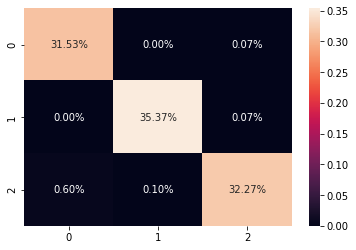

In [ ]:
### Evaluate overall test accuracy
yPred4 = model4.predict(X_test_np)
yPred4 = np.argmax(yPred4, axis=1)
print('Test accuracy = ', 100*np.mean(yPred4 == yTest))
matrix4 = confusion_matrix(yTest, yPred4)
seaborn.heatmap(matrix4/np.sum(matrix3), annot=True, fmt='.2%')

In [ ]:
### Accuracy on StyleGAN
name = 'StyleGAN'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix4[label, label]/np.sum(matrix4[label,:]))

Accuracy on StyleGAN = 0.9978902953586498


In [ ]:
### Accuracy on CelebFaces
name = 'CelebFaces'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix4[label, label]/np.sum(matrix4[label,:]))

Accuracy on CelebFaces = 0.9981185324553151


In [ ]:
### Accuracy on PGGAN
name = 'PGGAN'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix4[label, label]/np.sum(matrix4[label,:]))

Accuracy on PGGAN = 0.9787664307381193


# Gaussian Filter

In [ ]:
from scipy import ndimage

n_images = len(xTest)
X_test_np = np.zeros((n_images, 178, 178, 3))

kernel = kernel = np.array([[1, 2, 1],
                        [2,  4, 2],
                        [1, 2, 1]])/9

print('.... Loading Images From Files ....')
for i in range(n_images):
  img0 = xTest[i][:, :, 0]
  img1 = xTest[i][:, :, 1]
  img2 = xTest[i][:, :, 2]
  X_test_np[i, :, :, 0] = ndimage.convolve(img0, kernel, mode='constant')
  X_test_np[i, :, :, 1] = ndimage.convolve(img1, kernel, mode='constant')
  X_test_np[i, :, :, 2] = ndimage.convolve(img2, kernel, mode='constant')
  if i%1000 == 0:
    print('iteration', i)

.... Loading Images From Files ....
iteration 0
iteration 1000
iteration 2000


In [ ]:
model5 = tf.keras.models.load_model('/content/drive/My Drive/low_pass_model')
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 re_lu (ReLU)                (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 89, 89, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 89, 89, 64)        18496     
                                                                 
 re_lu_1 (ReLU)              (None, 89, 89, 64)        0         
                                                        

Test accuracy =  97.83333333333334


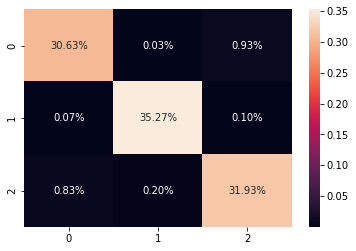

In [ ]:
### Evaluate overall test accuracy
yPred5 = model5.predict(X_test_np)
yPred5 = np.argmax(yPred5, axis=1)
print('Test accuracy = ', 100*np.mean(yPred5 == yTest))
matrix5 = confusion_matrix(yTest, yPred5)
seaborn.heatmap(matrix5/np.sum(matrix5), annot=True, fmt='.2%')

In [ ]:
### Accuracy on StyleGAN
name = 'StyleGAN'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix5[label, label]/np.sum(matrix5[label,:]))

Accuracy on StyleGAN = 0.9694092827004219


In [ ]:
### Accuracy on CelebFaces
name = 'CelebFaces'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix5[label, label]/np.sum(matrix5[label,:]))

Accuracy on CelebFaces = 0.9952963311382879


In [ ]:
### Accuracy on PGGAN
name = 'PGGAN'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix5[label, label]/np.sum(matrix5[label,:]))

Accuracy on PGGAN = 0.9686552072800809


# 3x3 Laplacian Filter + 3x3 Gaussian Filter

In [ ]:
from scipy import ndimage

n_images = len(xTest)
X_test_np = np.zeros((n_images, 178, 178, 6))

low_kernel = np.array([[1, 2, 1],
                   [2,  4, 2],
                   [1, 2, 1]])/9

high_kernel = np.array([[1, 1, 1],
                        [1, -8, 1],
                        [1, 1, 1]])

print('.... Loading Images From Files ....')
for i in range(n_images):
  img0 = xTest[i][:, :, 0]
  img1 = xTest[i][:, :, 1]
  img2 = xTest[i][:, :, 2]
  X_test_np[i, :, :, 0] = ndimage.convolve(img0, low_kernel, mode='constant')
  X_test_np[i, :, :, 1] = ndimage.convolve(img1, low_kernel, mode='constant')
  X_test_np[i, :, :, 2] = ndimage.convolve(img2, low_kernel, mode='constant')
  X_test_np[i, :, :, 3] = ndimage.convolve(img0, high_kernel, mode='constant')
  X_test_np[i, :, :, 4] = ndimage.convolve(img1, high_kernel, mode='constant')
  X_test_np[i, :, :, 5] = ndimage.convolve(img2, high_kernel, mode='constant')
  if i%1000 == 0:
    print('iteration', i)

.... Loading Images From Files ....
iteration 0
iteration 1000
iteration 2000


In [ ]:
model5 = tf.keras.models.load_model('/content/drive/My Drive/high_low_model')
model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      1760      
                                                                 
 re_lu_3 (ReLU)              (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 89, 89, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 89, 89, 64)        18496     
                                                                 
 re_lu_4 (ReLU)              (None, 89, 89, 64)        0         
                                                      

Test accuracy =  99.46666666666667


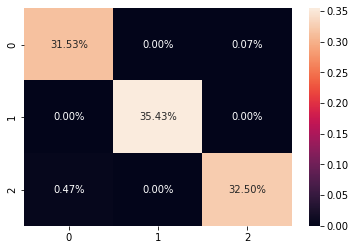

In [ ]:
### Evaluate overall test accuracy
yPred5 = model5.predict(X_test_np)
yPred5 = np.argmax(yPred5, axis=1)
print('Test accuracy = ', 100*np.mean(yPred5 == yTest))
matrix5 = confusion_matrix(yTest, yPred5)
seaborn.heatmap(matrix5/np.sum(matrix5), annot=True, fmt='.2%')

In [ ]:
### Accuracy on StyleGAN
name = 'StyleGAN'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix5[label, label]/np.sum(matrix5[label,:]))

Accuracy on StyleGAN = 0.9978902953586498


In [ ]:
### Accuracy on CelebFaces
name = 'CelebFaces'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix5[label, label]/np.sum(matrix5[label,:]))

Accuracy on CelebFaces = 1.0


In [ ]:
### Accuracy on PGGAN
name = 'PGGAN'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix5[label, label]/np.sum(matrix5[label,:]))

Accuracy on PGGAN = 0.9858442871587462


# 3x3 Laplacian Filter & Minibatch Std. Dev.

In [ ]:
from scipy import ndimage

n_images = len(xTest)
X_test_np = np.zeros((n_images, 178, 178, 3))

kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

print('.... Loading Images From Files ....')
for i in range(n_images):
  img0 = xTest[i][:, :, 0]
  img1 = xTest[i][:, :, 1]
  img2 = xTest[i][:, :, 2]
  X_test_np[i, :, :, 0] = ndimage.convolve(img0, kernel, mode='constant')
  X_test_np[i, :, :, 1] = ndimage.convolve(img1, kernel, mode='constant')
  X_test_np[i, :, :, 2] = ndimage.convolve(img2, kernel, mode='constant')
  if i%1000 == 0:
    print('iteration', i)

.... Loading Images From Files ....
iteration 0
iteration 1000
iteration 2000


In [ ]:
X_test_np.shape

In [ ]:
model8 = tf.keras.models.load_model('/content/drive/My Drive/minibatchstddev')
model8.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 re_lu_13 (ReLU)             (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 89, 89, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 89, 89, 64)        18496     
                                                                 
 re_lu_14 (ReLU)             (None, 89, 89, 64)        0         
                                                      

Test accuracy =  99.7


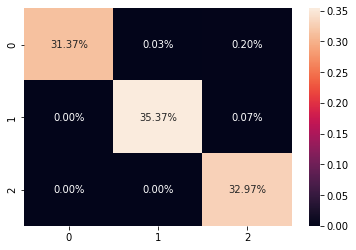

In [ ]:
### Evaluate overall test accuracy
yPred8 = model8.predict(X_test_np)
yPred8 = np.argmax(yPred8, axis=1)
print('Test accuracy = ', 100*np.mean(yPred8 == yTest))
matrix8 = confusion_matrix(yTest, yPred8)
seaborn.heatmap(matrix8/np.sum(matrix8), annot=True, fmt='.2%')

In [ ]:
### Accuracy on StyleGAN
name = 'StyleGAN'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix8[label, label]/np.sum(matrix8[label,:]))

Accuracy on StyleGAN = 0.9926160337552743


In [ ]:
### Accuracy on CelebFaces
name = 'CelebFaces'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix8[label, label]/np.sum(matrix8[label,:]))

Accuracy on CelebFaces = 0.9981185324553151


In [ ]:
### Accuracy on PGGAN
name = 'PGGAN'
label = str_to_int[name]
print('Accuracy on',name,'=', matrix8[label, label]/np.sum(matrix8[label,:]))

Accuracy on PGGAN = 1.0


# Visualizing Final Model

In [ ]:
### GradCAM implementation from: https://colab.research.google.com/drive/1rxmXus_nrGEhxlQK_By38AjwDxwmLn9S?usp=sharing
from tensorflow.keras.models import Model

def GradCam(model, img_array, layer_name, eps=1e-8):
    '''
    Creates a grad-cam heatmap given a model and a layer name contained with that model
    

    Args:
      model: tf model
      img_array: (img_width x img_width) numpy array
      layer_name: str


    Returns 
      uint8 numpy array with shape (img_height, img_width)

    '''

    gradModel = Model(
			inputs=[model.inputs],
			outputs=[model.get_layer(layer_name).output,
				model.output])
    
    with tf.GradientTape() as tape:
			# cast the image tensor to a float-32 data type, pass the
			# image through the gradient model, and grab the loss
			# associated with the specific class index
      inputs = tf.cast(img_array, tf.float32)
      (convOutputs, predictions) = gradModel(inputs)
      loss = predictions[:, 0]
		# use automatic differentiation to compute the gradients
    grads = tape.gradient(loss, convOutputs)
    
    # compute the guided gradients
    castConvOutputs = tf.cast(convOutputs > 0, "float32")
    castGrads = tf.cast(grads > 0, "float32")
    guidedGrads = castConvOutputs * castGrads * grads
		# the convolution and guided gradients have a batch dimension
		# (which we don't need) so let's grab the volume itself and
		# discard the batch
    convOutputs = convOutputs[0]
    guidedGrads = guidedGrads[0]
    # compute the average of the gradient values, and using them
		# as weights, compute the ponderation of the filters with
		# respect to the weights
    weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
  
    # grab the spatial dimensions of the input image and resize
		# the output class activation map to match the input image
		# dimensions
    (w, h) = (img_array.shape[2], img_array.shape[1])
    heatmap = cv2.resize(cam.numpy(), (w, h))
		# normalize the heatmap such that all values lie in the range
		# [0, 1], scale the resulting values to the range [0, 255],
		# and then convert to an unsigned 8-bit integer
    numer = heatmap - np.min(heatmap)
    denom = (heatmap.max() - heatmap.min()) + eps
    heatmap = numer / denom
    # heatmap = (heatmap * 255).astype("uint8")
		# return the resulting heatmap to the calling function
    return heatmap


def sigmoid(x, a, b, c):
    return c / (1 + np.exp(-a * (x-b)))

def superimpose(img_bgr, cam, thresh, emphasize=False):
    
    '''
    Superimposes a grad-cam heatmap onto an image for model interpretation and visualization.
    

    Args:
      image: (img_width x img_height x 3) numpy array
      grad-cam heatmap: (img_width x img_width) numpy array
      threshold: float
      emphasize: boolean

    Returns 
      uint8 numpy array with shape (img_height, img_width, 3)

    '''
    heatmap = cv2.resize(cam, (img_bgr.shape[1], img_bgr.shape[0]))
    if emphasize:
        heatmap = sigmoid(heatmap, 50, thresh, 1)
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    hif = .8
    superimposed_img = heatmap * hif + img_bgr
    superimposed_img = np.minimum(superimposed_img, 255.0).astype(np.uint8)  # scale 0 to 255  
    superimposed_img_rgb = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
    
    return superimposed_img_rgb

In [ ]:
final_model = model8
final_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 re_lu_13 (ReLU)             (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 89, 89, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 89, 89, 64)        18496     
                                                                 
 re_lu_14 (ReLU)             (None, 89, 89, 64)        0         
                                                      

In [ ]:

xSG_np = X_test_np[np.where(yTest == 0)]
xCF_np = X_test_np[np.where(yTest == 1)]
xPG_np = X_test_np[np.where(yTest == 2)]

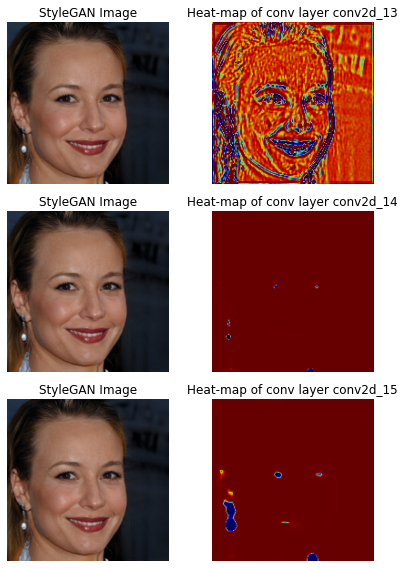

In [ ]:
### Visualize Grad-CAM heatmap of each convolutional layer in a single StyleGAN image
img_np = xSG_np[0]
img = xSG[0]
layer_names = ['conv2d_13', 'conv2d_14' ,'conv2d_15']
superimposed = []
for layer in layer_names:
  heatmap = GradCam(final_model, np.expand_dims(img_np, axis=0), layer)
  superimposed_image = superimpose(img, heatmap, 0.45, emphasize=True)
  superimposed.append(superimposed_image)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6, 8))
for row in range(len(layer_names)):
  axes[row,0].imshow(img)
  axes[row,0].title.set_text('StyleGAN Image')
  axes[row,0].axis('off')
  
  axes[row,1].imshow(superimposed[row])
  axes[row,1].axis('off')
  axes[row,1].title.set_text('Heat-map of conv layer '+layer_names[row])

plt.tight_layout()

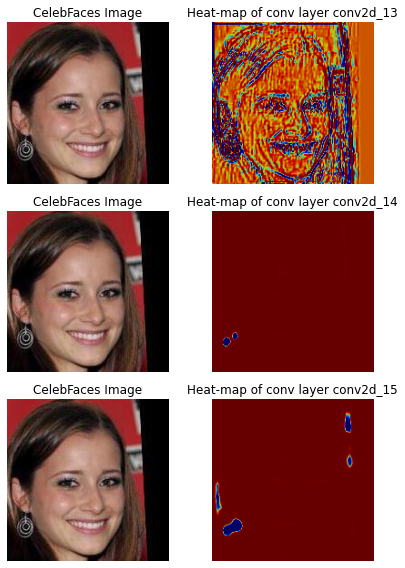

In [ ]:
### Visualize Grad-CAM heatmap of each convolutional layer in a single CelebFaces image
img_np = xCF_np[0]
img = xCF[0]
layer_names = ['conv2d_13', 'conv2d_14' ,'conv2d_15']
superimposed = []
for layer in layer_names:
  heatmap = GradCam(final_model, np.expand_dims(img_np, axis=0), layer)
  superimposed_image = superimpose(img, heatmap, 0.45, emphasize=True)
  superimposed.append(superimposed_image)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6, 8))
for row in range(len(layer_names)):
  axes[row,0].imshow(img)
  axes[row,0].title.set_text('CelebFaces Image')
  axes[row,0].axis('off')
  
  axes[row,1].imshow(superimposed[row])
  axes[row,1].axis('off')
  axes[row,1].title.set_text('Heat-map of conv layer '+layer_names[row])

plt.tight_layout()

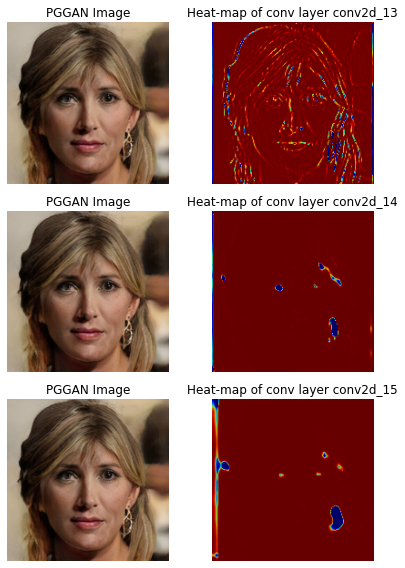

In [ ]:
### Visualize Grad-CAM heatmap of each convolutional layer in a single PGGAN image
img_np = xPG_np[3]
img = xPG[3]
layer_names = ['conv2d_13', 'conv2d_14' ,'conv2d_15']
superimposed = []
for layer in layer_names:
  heatmap = GradCam(final_model, np.expand_dims(img_np, axis=0), layer)
  superimposed_image = superimpose(img, heatmap, 0.45, emphasize=True)
  superimposed.append(superimposed_image)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6, 8))
for row in range(len(layer_names)):
  axes[row,0].imshow(img)
  axes[row,0].title.set_text('PGGAN Image')
  axes[row,0].axis('off')
  
  axes[row,1].imshow(superimposed[row])
  axes[row,1].axis('off')
  axes[row,1].title.set_text('Heat-map of conv layer '+layer_names[row])

plt.tight_layout()

(-0.5, 177.5, 177.5, -0.5)

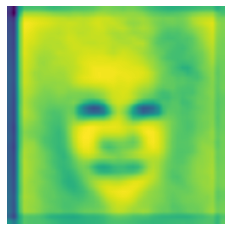

In [ ]:
### Find average StyleGAN Heatmap for Last Convolutional Layer
layer = 'conv2d_15'
num_images = len(xSG_np)
heatmapSG_np = np.zeros((178,178))
for img in xSG_np:
  heatmap = GradCam(final_model, np.expand_dims(img, axis=0), layer)
  heatmapSG_np += heatmap / num_images

plt.imshow(heatmapSG_np)
plt.axis('off')

(-0.5, 177.5, 177.5, -0.5)

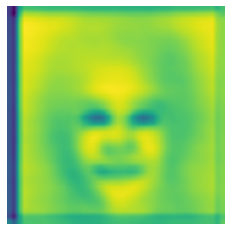

In [ ]:
### Find average CelebFaces Heatmap for Last Convolutional Layer
layer = 'conv2d_15'
num_images = len(xCF_np)
heatmapCF_np = np.zeros((178,178))
for img in xCF_np:
  heatmap = GradCam(final_model, np.expand_dims(img, axis=0), layer)
  heatmapCF_np += heatmap / num_images

plt.imshow(heatmapCF_np)
plt.axis('off')

(-0.5, 177.5, 177.5, -0.5)

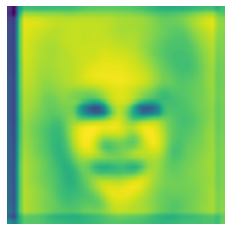

In [ ]:
### Find average PGGAN Heatmap for Last Convolutional Layer
layer = 'conv2d_15'
num_images = len(xPG_np)
heatmapPG_np = np.zeros((178,178))
for img in xPG_np:
  heatmap = GradCam(final_model, np.expand_dims(img, axis=0), layer)
  heatmapPG_np += heatmap / num_images

plt.imshow(heatmapPG_np)
plt.axis('off')

In [ ]:
### Visualize heatmaps for incorrect classifications
incorrect = np.where(yPred8 != yTest)[0]
print('Total of',len(incorrect), 'misclassifications.')

Total of  9 misclassifications.


In [ ]:
print(incorrect)
print(yTest[incorrect])

[ 347  469  540  597 1240 1803 2138 2181 2459]
[0 0 0 1 0 0 1 0 0]


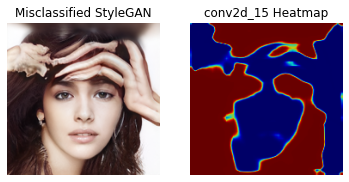

In [ ]:
### Visualize incorrectly classified StyleGAN image's final convolutional layer heatmap
img = xTest[469]
layer = 'conv2d_15'
heatmap = GradCam(final_model, np.expand_dims(img, axis=0), layer)
superimposed_image = superimpose(img, heatmap, 0.5, emphasize=True)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 10))
axes[0].imshow(img)
axes[0].title.set_text('Misclassified StyleGAN')
axes[0].axis('off')
axes[1].imshow(superimposed_image)
axes[1].title.set_text('conv2d_15 Heatmap')
axes[1].axis('off')
plt.show()

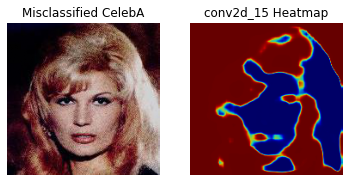

In [ ]:
### Visualize both incorrectly classified CelebA image's final convolutional layer heatmap
img = xTest[597]
layer = 'conv2d_15'
heatmap = GradCam(final_model, np.expand_dims(img, axis=0), layer)
superimposed_image = superimpose(img, heatmap, 0.5, emphasize=True)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 10))
axes[0].imshow(img)
axes[0].title.set_text('Misclassified CelebA')
axes[0].axis('off')
axes[1].imshow(superimposed_image)
axes[1].title.set_text('conv2d_15 Heatmap')
axes[1].axis('off')
plt.show()

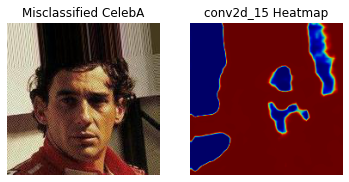

In [ ]:
### Visualize both incorrectly classified CelebA image's final convolutional layer heatmap
img = xTest[2138]
layer = 'conv2d_15'
heatmap = GradCam(final_model, np.expand_dims(img, axis=0), layer)
superimposed_image = superimpose(img, heatmap, 0.5, emphasize=True)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 10))
axes[0].imshow(img)
axes[0].title.set_text('Misclassified CelebA')
axes[0].axis('off')
axes[1].imshow(superimposed_image)
axes[1].title.set_text('conv2d_15 Heatmap')
axes[1].axis('off')
plt.show()